In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import seaborn as sns
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Set the pathway of train & test folders and gender class.

In [ ]:
train_path ="...../gender/gender_archive/Training"
test_path = "...../gender/gender_archive/Validation"

train_male = "..../gender/gender_archive/Training/male"
train_female = "..../gender/gender_archive/Training/female"

test_male = "......./gender/gender_archive/Validation/male"
test_female = "...../gender/gender_archive/Validation/female"




Draw Barplots of Train/Test and Gender.

In [ ]:
def draw_categories(path):
    category_names = os.listdir(path)
    train_male_names = os.listdir(train_male)


    num_category_names =len(category_names)
    images = []
    for category in category_names:
        folder = path +"/"+ category
        images.append(len(os.listdir(folder)))

    g = sns.barplot(x=category_names,y=images)
    g.set_title("Gender Category of Train Set");
    print("number of images of males "+ str(images[1]))
    print("number of images of females "+ str(images[0]))
    print("total number of images:" + str(sum(images)))

    return g

number of images of males 23757
number of images of females 23243
total number of images:47000


<AxesSubplot:title={'center':'Gender Category of Train Set'}>

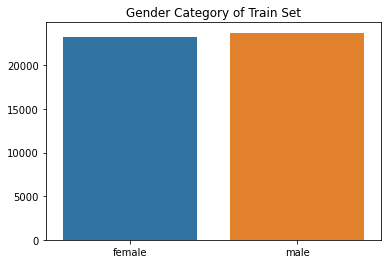

In [ ]:
draw_categories(train_path)

number of images of males 5799
number of images of females 5841
total number of images:11640


<AxesSubplot:title={'center':'Gender Category of Train Set'}>

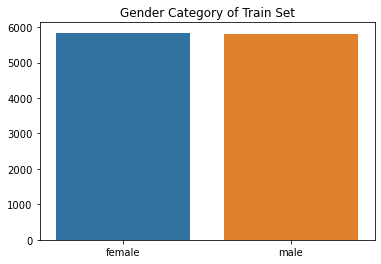

In [ ]:
draw_categories(test_path)

Show some images from genders of train/test folders

In [ ]:
#example images:
def show_images(category_gender):
    category_gender_names = os.listdir(category_gender)
    nrows = 4
    ncols = 4

    # Index for iterating over images
    pic_index = 0

    fig = plt.gcf()
    fig.set_size_inches(ncols * 4, nrows * 4)

    pic_index += 8
    next_pix = [os.path.join(category_gender, fname) 
                for fname in category_gender_names[pic_index-8:pic_index]]

    for i, img_path in enumerate(next_pix):
      # Set up subplot; subplot indices start at 1
      sp = plt.subplot(nrows, ncols, i + 1)
      sp.axis('Off') # Don't show axes (or gridlines)

      img = mpimg.imread(img_path)
      plt.imshow(img)

    return plt.show()

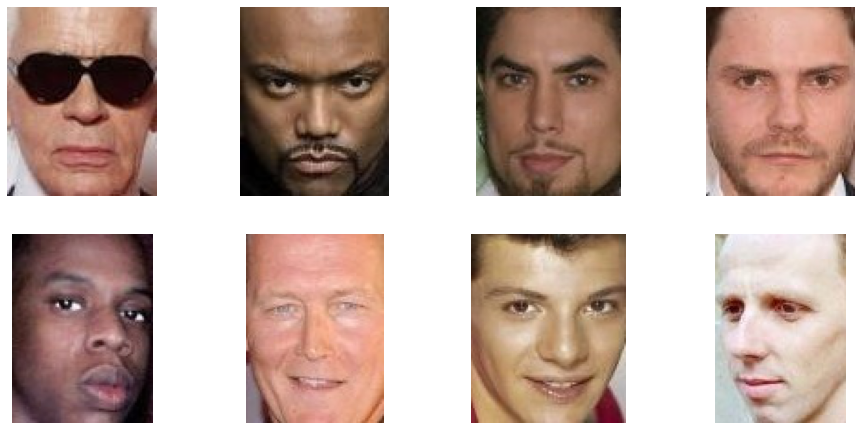

In [ ]:
show_images(train_male)

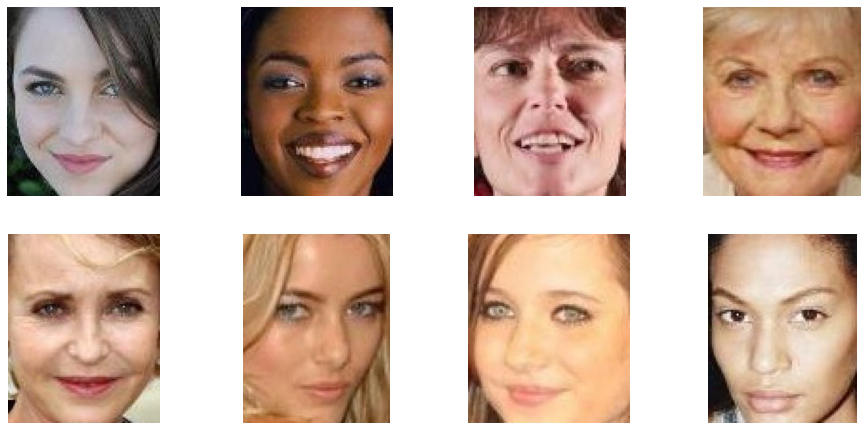

In [ ]:
show_images(train_female)

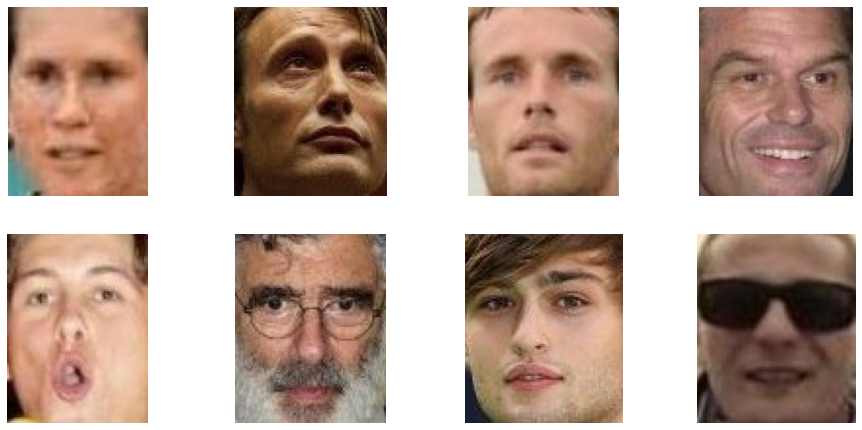

In [ ]:
show_images(test_male)

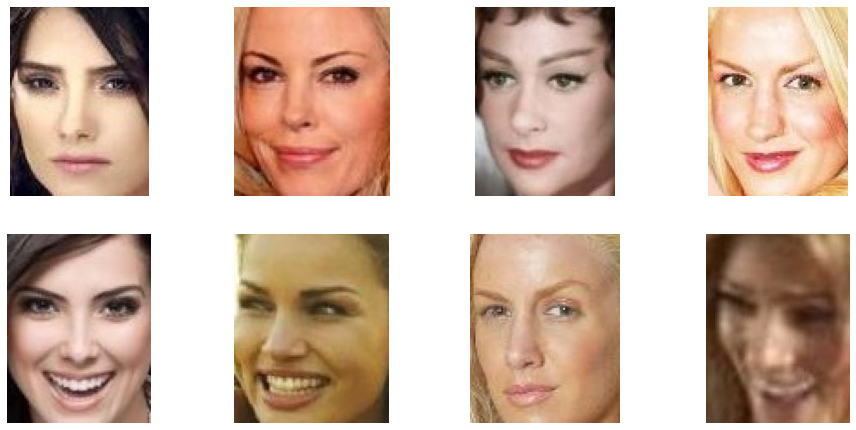

In [ ]:
show_images(test_female)

In [ ]:
from tensorflow.keras import regularizers #regularizer for preventing overfitting


In [ ]:
#Build the model function
def my_model():
    model= tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3), kernel_regularizer=regularizers.l2(0.01),
                                                              activation="relu",input_shape=(150,150,3),padding='same'),
                                   tf.keras.layers.Dropout(0.3),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(64,(3,3),activation="relu",padding='same'),
                                   tf.keras.layers.Dropout(0.3),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(64,(3,3),activation="relu",padding='same'),
                                   tf.keras.layers.Dropout(0.3),
                                   tf.keras.layers.MaxPool2D(2,2),  
                                   tf.keras.layers.Conv2D(128,(3,3),activation="relu",padding='same'),
                                   tf.keras.layers.Dropout(0.3),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(256,activation="relu"),
                                   tf.keras.layers.Dense(1,activation="sigmoid")

                                  ])
    model.compile(loss="binary_crossentropy",metrics=["accuracy"],optimizer="adam")
    model.summary()
    return model

model instance and use ImageDataGenerator to preprocess images and Image augmentation

In [ ]:
model= my_model()
train_data_gen = ImageDataGenerator( rescale=1./255,
                                     rotation_range=30,
                                     width_shift_range=0.2,
                                     shear_range=0.3,
                                     zoom_range=0.3,
                                     fill_mode='nearest',
                                     validation_split=0.15
                                    
                                   )
test_data_gen = ImageDataGenerator(rescale= 1./255.)


In [ ]:
train_generator = train_data_gen.flow_from_directory(
 train_path,
 target_size=(150, 150), 
 batch_size=48,
 class_mode='binary',
 )

Found 47000 images belonging to 2 classes.


In [ ]:
test_generator = test_data_gen.flow_from_directory(
 test_path,
 target_size=(150, 150), 
 batch_size=48,
 class_mode='binary',
)

Found 11640 images belonging to 2 classes.


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5) # trace the validation accuracy. If the validation accuracy decrease 5 times training process stops.

In [ ]:
history = model.fit(
 train_generator,
 steps_per_epoch=70, 
 epochs=30,
 validation_data=test_generator,
 validation_steps=50, 
 #callbacks=[callback],
 verbose=2)
#fit the model

Epoch 1/30
70/70 - 17s - loss: 0.7684 - accuracy: 0.5646 - val_loss: 0.6989 - val_accuracy: 0.6354
Epoch 2/30
70/70 - 15s - loss: 0.6189 - accuracy: 0.6932 - val_loss: 0.6212 - val_accuracy: 0.7117
Epoch 3/30
70/70 - 16s - loss: 0.5876 - accuracy: 0.7298 - val_loss: 0.5902 - val_accuracy: 0.7975
Epoch 4/30
70/70 - 16s - loss: 0.4960 - accuracy: 0.7910 - val_loss: 0.5945 - val_accuracy: 0.7958
Epoch 5/30
70/70 - 16s - loss: 0.4674 - accuracy: 0.8060 - val_loss: 0.4975 - val_accuracy: 0.8629
Epoch 6/30
70/70 - 16s - loss: 0.4312 - accuracy: 0.8310 - val_loss: 0.4837 - val_accuracy: 0.8746
Epoch 7/30
70/70 - 16s - loss: 0.4533 - accuracy: 0.8083 - val_loss: 0.5007 - val_accuracy: 0.8508
Epoch 8/30
70/70 - 19s - loss: 0.3957 - accuracy: 0.8432 - val_loss: 0.4295 - val_accuracy: 0.8858
Epoch 9/30
70/70 - 19s - loss: 0.3939 - accuracy: 0.8417 - val_loss: 0.4283 - val_accuracy: 0.8892
Epoch 10/30
70/70 - 18s - loss: 0.3696 - accuracy: 0.8545 - val_loss: 0.3451 - val_accuracy: 0.9117
Epoch 11/

In [ ]:
model.save('...../gender/gender_archive/model.h5') #save model


In [ ]:
#loaded_model = tf.keras.models.load_model('....../gender/gender_archive/model.h5') #load the model

<Figure size 432x288 with 0 Axes>

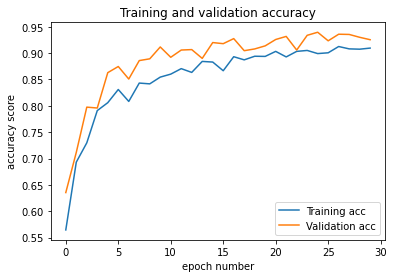

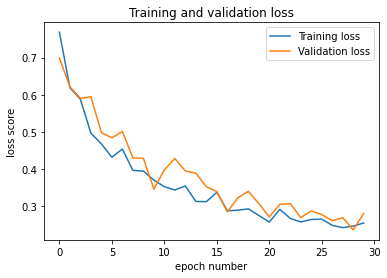

<Figure size 432x288 with 0 Axes>

In [ ]:
#visulasing results
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) 

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,acc )
plt.plot  ( epochs,val_acc )
plt.title ('Training and validation accuracy')
plt.legend(['Training acc', 'Validation acc'])
plt.xlabel("epoch number")
plt.ylabel("accuracy score")
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.legend(['Training loss', 'Validation loss'])
plt.title ('Training and validation loss'   )
plt.xlabel("epoch number")
plt.ylabel("loss score")
plt.figure()


In [ ]:
from keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions


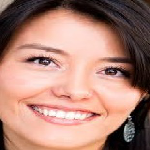

In [ ]:
img_path= "...../images (1).jfif" #example image path
img = image.load_img(img_path, target_size=(150, 150))
img

In [ ]:
#get result from the image
def get_result(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    x = image.img_to_array(img) #turn image to array
    x /= 255 #normalize the image
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    #print(classes[0])
    if classes[0]>0.5:
        print("it" + " is a man")
    else:
        print("it" + " is a woman")    

In [ ]:
img_path1= "C:/Users/neobu/Desktop/burak.png"

get_result(img_path1)

it is a man


In [ ]:
get_result(img_path)

it is a woman
